# Import Libraries needed to run notebook

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I. Read in Data

In [2]:
# Define optimal nm for 12 point spectrum
nm_optimal = [680, 700, 730, 760, 800, 850]
nm_optimal

[680, 700, 730, 760, 800, 850]

In [3]:
# Read in Hb dat, filtering on nms of choice
Hb_dat = pd.read_csv(r'Hb.csv')
Hb_dat = Hb_dat.loc[Hb_dat['nm'].isin(nm_optimal)].copy()
Hb_dat['Hb_signal'] = [int(x.split(';')[1]) for x in Hb_dat['var1']]

# Save max signal for normalization purposes
max_signal = np.max(Hb_dat['Hb_signal'])
Hb_dat['Hb_signal'] = Hb_dat['Hb_signal']/max_signal
Hb_dat

,nm,var1,var2,Hb_signal
20,680,0000;2547,1957,1.000000
40,700,0000;1803,9736,0.707892
70,730,0000;1148,2775,0.450726
100,760,0000;1525,3238,0.598744
140,800,0000;778,2100,0.305457
190,850,0000;683,2000,0.268159


In [4]:
# Read in HbO2 dat
HbO2_dat = pd.read_csv(r'HbO2.csv')
HbO2_dat = HbO2_dat.loc[HbO2_dat['nm'].isin(nm_optimal)].copy()
HbO2_dat['HbO2_signal'] = [int(x.split(';')[1]) for x in HbO2_dat['var1']]
HbO2_dat['HbO2_signal'] = HbO2_dat['HbO2_signal']/max_signal
HbO2_dat

,nm,var1,var2,HbO2_signal
20,680,0000;268,6262,0.105222
40,700,0000;285,5616,0.111896
70,730,0000;386,4001,0.151551
100,760,0000;592,7210,0.232430
140,800,0000;796,9595,0.312525
190,850,0000;1055,1370,0.414213


In [5]:
# Combine datasets
dat = Hb_dat[['nm','Hb_signal']].merge(HbO2_dat[['nm', 'HbO2_signal']], 
                                       on = 'nm')
dat

,nm,Hb_signal,HbO2_signal
0,680,1.000000,0.105222
1,700,0.707892,0.111896
2,730,0.450726,0.151551
3,760,0.598744,0.232430
4,800,0.305457,0.312525
5,850,0.268159,0.414213


# II. awgn plot

In [6]:
# Create dataset with user defined fractional components

## User defined fractional components
Hb_frac = 0.2
HbO2_frac = 1-Hb_frac

## Create fractional dataset
dat_frac = dat.copy()
dat_frac['Hb_signal'] = dat_frac['Hb_signal']*Hb_frac
dat_frac['HbO2_signal'] = dat_frac['HbO2_signal']*HbO2_frac
dat_frac['MSOT_signal_clean'] = dat_frac['Hb_signal'] +\
                                dat_frac['HbO2_signal']
dat_frac['MSOT_signal_0.01'] = dat_frac['MSOT_signal_clean'] +\
                               np.random.normal(0,0.01,6)
dat_frac['MSOT_signal_0.05'] = dat_frac['MSOT_signal_clean'] +\
                               np.random.normal(0,0.05,6)
dat_frac['MSOT_signal_0.1'] = dat_frac['MSOT_signal_clean'] +\
                              np.random.normal(0,0.1,6)
dat_frac['MSOT_signal_0.2'] = dat_frac['MSOT_signal_clean'] +\
                              np.random.normal(0,0.2,6)
dat_frac

,nm,Hb_signal,HbO2_signal,MSOT_signal_clean,MSOT_signal_0.01,MSOT_signal_0.05,MSOT_signal_0.1,MSOT_signal_0.2
0,680,0.200000,0.084177,0.284177,0.291517,0.388179,0.160133,0.202916
1,700,0.141578,0.089517,0.231095,0.235669,0.218367,0.172346,0.299732
2,730,0.090145,0.121241,0.211386,0.212282,0.154447,0.113343,0.394274
3,760,0.119749,0.185944,0.305693,0.295524,0.301582,0.172712,0.596225
4,800,0.061091,0.250020,0.311111,0.297257,0.284796,0.210919,0.296721
5,850,0.053632,0.331370,0.385002,0.371736,0.395759,0.456737,0.583763


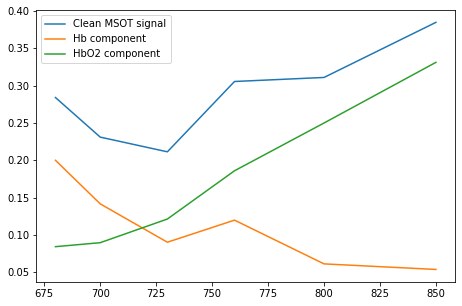

In [7]:
# Plot clean
fig, ax = plt.subplots(1,1, figsize = (7.5,5))
ax.plot(dat_frac['nm'], dat_frac['MSOT_signal_clean'], 
         label = "Clean MSOT signal") # Raw Signal

# Hb component
ax.plot(dat_frac['nm'], dat_frac['Hb_signal'], 
         label = "Hb component")
# HbO2 component
ax.plot(dat_frac['nm'], dat_frac['HbO2_signal'], 
         label = "HbO2 component")

# Plot
ax.legend()

(0.05, 0.4)

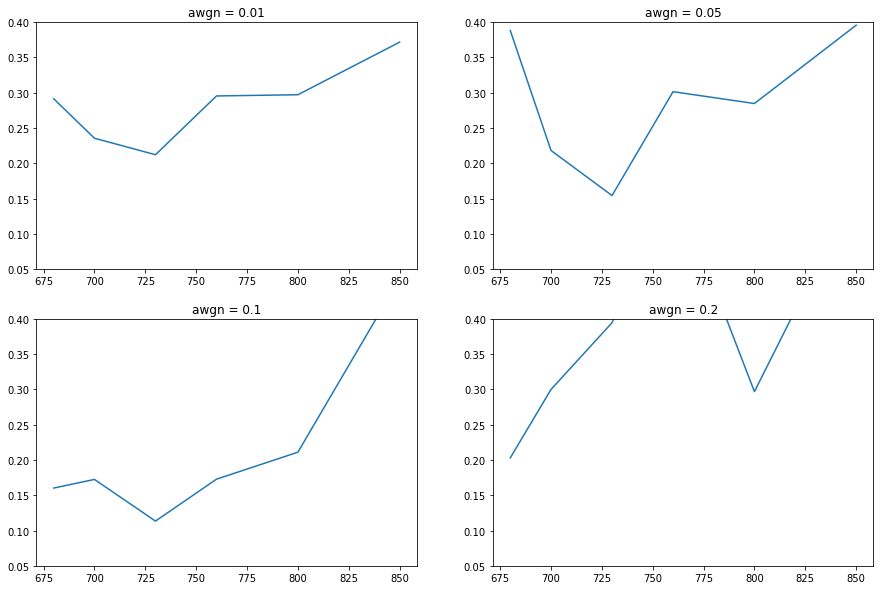

In [8]:
# Plot
fig, axs = plt.subplots(2, 2, figsize = (15,10))
# Noise Level 0.01
axs[0, 0].plot(dat_frac['nm'], dat_frac['MSOT_signal_0.01'])
axs[0, 0].title.set_text('awgn = 0.01')
axs[0, 0].set_ylim(bottom = 0.05, top = 0.40)
# Noise Level 0.05
axs[0, 1].plot(dat_frac['nm'], dat_frac['MSOT_signal_0.05'])
axs[0, 1].title.set_text('awgn = 0.05')
axs[0, 1].set_ylim(bottom = 0.05, top = 0.40)
# Noise Level 0.1
axs[1, 0].plot(dat_frac['nm'], dat_frac['MSOT_signal_0.1'])
axs[1, 0].title.set_text('awgn = 0.1')
axs[1, 0].set_ylim(bottom = 0.05, top = 0.40)
# Noise Level 0.2
axs[1, 1].plot(dat_frac['nm'], dat_frac['MSOT_signal_0.2'])
axs[1, 1].title.set_text('awgn = 0.2')
axs[1, 1].set_ylim(bottom = 0.05, top = 0.40)